In [1]:
%reset -f
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
mat = sio.loadmat("data/ex8movies.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [5]:
#y        = [n_movies, n_users] i.e. y[i,j] is rating for movie i by user j 
#is_rated = [n_movies, n_users] i.e. r[i,j] = 1 if user j rated movie i else 0
y        = mat["Y"]
is_rated = mat["R"]

In [6]:
mat = sio.loadmat("data/ex8movies-params.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])

In [7]:
#x     = [n_movies, n_features] i.e. x[i,j] is feature j for movie i
#theta = [n_users, n_features] i.e. theta[i,j] is parameter feature j for user i 
x     = mat["X"]
theta = mat["Theta"]

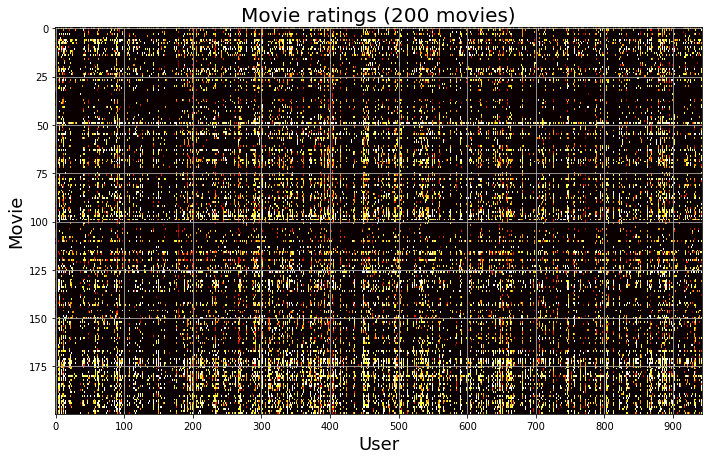

In [8]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.imshow(y[:200,:], cmap = "hot", interpolation = "nearest")
ax.set_title("Movie ratings (200 movies)", fontsize = 20)
ax.set_xlabel("User", fontsize = 18)
ax.set_ylabel("Movie", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [9]:
model = sbbml.CollaborativeFiltering()

In [10]:
y_norm, y_mean = model.normalize_ratings(y, is_rated)

In [11]:
cost = model.gradient_descent(y, is_rated)

In [12]:
cost

[686352.0,
 686352.0,
 686352.0,
 686352.0,
 686352.0,
 686352.0,
 686352.0,
 686352.0,
 686352.0,
 686352.0]

In [13]:
model.x_grad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
model.theta_grad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y       = np.array([[1,2], [3,4], [5,6]])
y_prime = np.array([[1,1], [1,1], [1,1]])
is_rate = np.array([[0,1], [0,1], [0,0]])

In [16]:
y - y_prime

array([[0, 1],
       [2, 3],
       [4, 5]])

In [17]:
is_rate

array([[0, 1],
       [0, 1],
       [0, 0]])

In [18]:
(y - y_prime) ** 2

array([[ 0,  1],
       [ 4,  9],
       [16, 25]], dtype=int32)

In [19]:
np.sum((y - y_prime) ** 2)

55

In [20]:
np.sum(((y - y_prime) ** 2) * is_rate)

10